In [ ]:
import pandas as pd

In [ ]:
path = '/content/Stock_data.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:

df['Gmt time'] = pd.to_datetime(df['Gmt time'], format="%d.%m.%Y %H:%M:%S.%f")


start_date = input("Enter the start date (dd.mm.yyyy): ")
end_date = input("Enter the end date (dd.mm.yyyy): ")


start_date = pd.to_datetime(start_date, format="%d.%m.%Y")
end_date = pd.to_datetime(end_date, format="%d.%m.%Y")


filtered_df = df[(df['Gmt time'] >= start_date) & (df['Gmt time'] <= end_date)]


ema12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()
ema26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()


Enter the start date (dd.mm.yyyy): 12.12.2012
Enter the end date (dd.mm.yyyy): 12.12.2020


In [ ]:

print("EMA12 for the selected date range:")
print(ema12)
print("\nEMA26 for the selected date range:")
print(ema26)

EMA12 for the selected date range:
0        1.235200
1        1.235068
2        1.235043
3        1.235315
4        1.235759
           ...   
12885    1.615822
12886    1.614916
12887    1.613659
12888    1.612683
12889    1.611929
Name: Close, Length: 12890, dtype: float64

EMA26 for the selected date range:
0        1.235200
1        1.235136
2        1.235119
3        1.235244
4        1.235464
           ...   
12885    1.621756
12886    1.620880
12887    1.619833
12888    1.618906
12889    1.618082
Name: Close, Length: 12890, dtype: float64


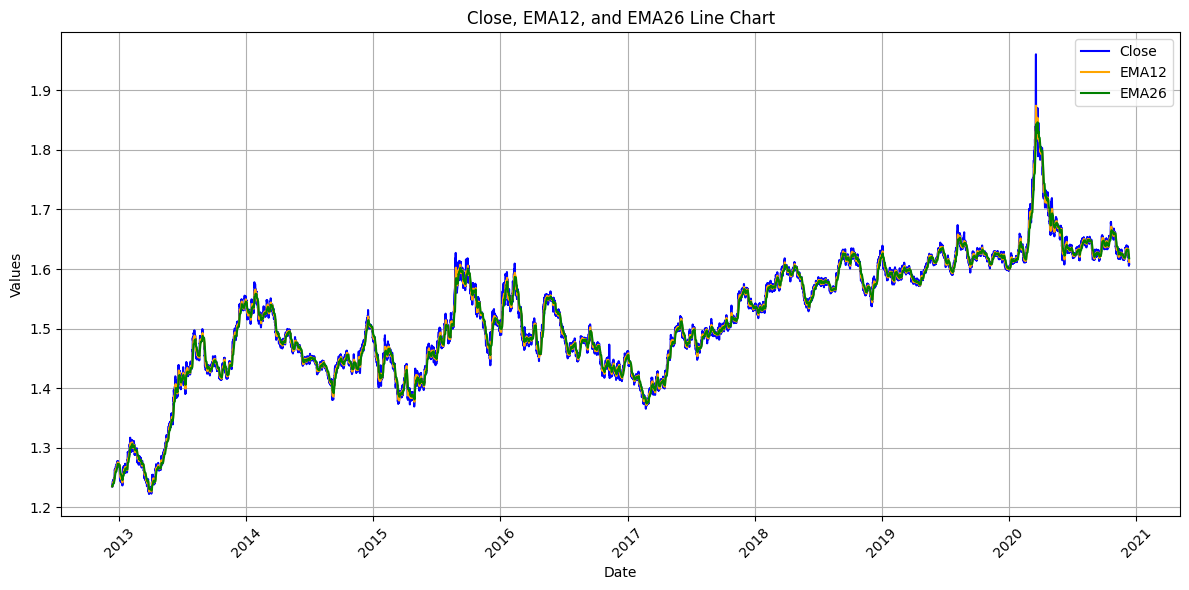

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['Close'], label='Close', color='blue')
plt.plot(filtered_df['Gmt time'], ema12, label='EMA12', color='orange')
plt.plot(filtered_df['Gmt time'], ema26, label='EMA26', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Close, EMA12, and EMA26 Line Chart')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [ ]:


ema12 = filtered_df['Close'].ewm(span=12, adjust=False).mean()
ema26 = filtered_df['Close'].ewm(span=26, adjust=False).mean()

macd_line = ema12 - ema26

signal_line = macd_line.ewm(span=9, adjust=False).mean()

macd_histogram = macd_line - signal_line

filtered_df['MACD Line'] = macd_line
filtered_df['Signal Line'] = signal_line
filtered_df['MACD Histogram'] = macd_histogram


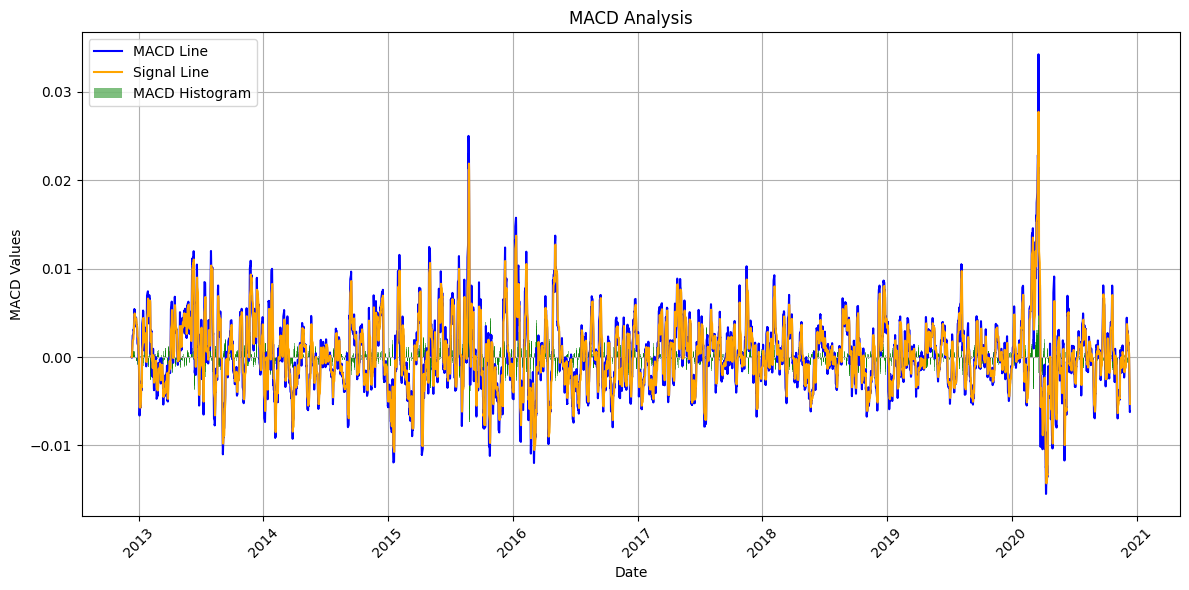

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Gmt time'], filtered_df['MACD Line'], label='MACD Line', color='blue')
plt.plot(filtered_df['Gmt time'], filtered_df['Signal Line'], label='Signal Line', color='orange')
plt.bar(filtered_df['Gmt time'], filtered_df['MACD Histogram'], label='MACD Histogram', color='green', alpha=0.5)

# Customize the plot
plt.title('MACD Analysis')
plt.xlabel('Date')
plt.ylabel('MACD Values')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()